### <center>KARUNIA PUTRI</center>
#### <center>F1D022010</center>

## Modul 4 Perbaikan Kualitas Citra dan Deteksi Tepi

## Import Library

In [274]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Kode di atas mengimpor tiga paket Python yang umum digunakan untuk pemrosesan gambar dan visualisasi: cv2 (OpenCV), numpy (untuk manipulasi array numerik), dan matplotlib (untuk visualisasi data). Kode tersebut kemudian menggunakan alias untuk setiap paket, yaitu cv untuk OpenCV, np untuk NumPy, dan plt serta mpimg untuk matplotlib. Setelah impor, kode ini siap digunakan untuk membaca, memanipulasi, dan menampilkan gambar menggunakan fungsionalitas yang disediakan oleh paket-paket tersebut.

Kode di bawah  menggunakan matplotlib untuk membaca gambar dengan nama file "manchester_united.jpeg" yang terletak di direktori "../assets/", kemudian menampilkannya menggunakan fungsi plt.imshow(). Pertama, gambar dibaca ke dalam variabel imgMU menggunakan fungsi plt.imread(). Kemudian, gambar tersebut ditampilkan di dalam suatu plot menggunakan fungsi plt.imshow(). Proses ini memungkinkan pengguna untuk dengan mudah membaca dan menampilkan gambar.

## Menampilkan Citra

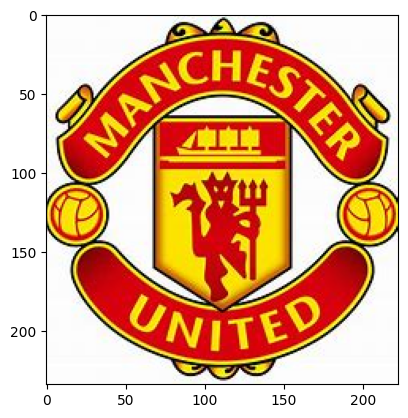

In [275]:
imgMU = plt.imread('../assets/manchester_united.jpeg')
plt.imshow(imgMU)

Kode di bawah  membaca gambar "manchester_united.jpeg" ke dalam variabel image menggunakan matplotlib.image.imread(). Selanjutnya, gambar tersebut diubah menjadi citra skala abu-abu menggunakan fungsi cv.cvtColor() dari OpenCV dengan mode konversi cv.COLOR_BGR2GRAY. Citra skala abu-abu kemudian diproses dengan menambahkan bingkai satu piksel menggunakan np.pad() dari NumPy, dan hasilnya disimpan dalam variabel gray_image. Setelah itu, ukuran gambar diproses dan disimpan dalam variabel height dan width. Seluruh gambar, baik asli maupun dalam skala abu-abu, ditampilkan dalam satu figur dengan ukuran yang telah ditentukan menggunakan matplotlib.pyplot.figure() dan matplotlib.pyplot.subplot(), serta disertai judul pada setiap subplot. Hasil akhir ditampilkan dengan matplotlib.pyplot.show().

## Menampilkan Citra Skala Abu-abu

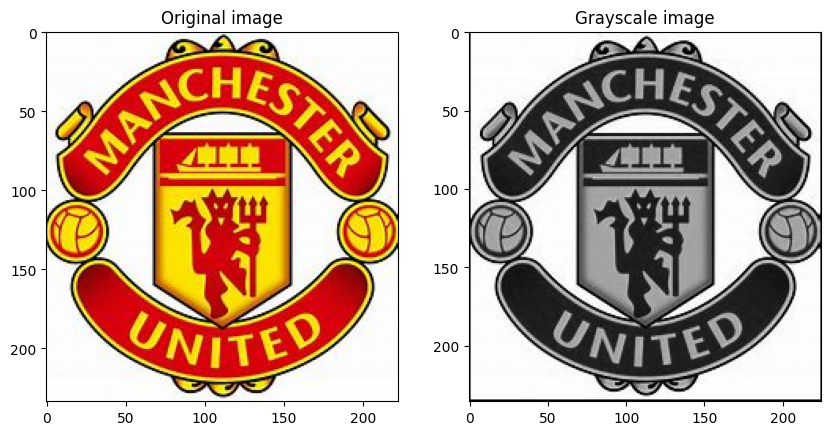

In [276]:
image = mpimg.imread("../assets/manchester_united.jpeg")
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
gray_image = np.pad(gray, 1)
height, width = gray_image.shape
hasil = np.zeros((height, width), dtype=np.uint8)
plt.figure(figsize=(10, 5))  

plt.subplot(121)
plt.title("Original image")
plt.imshow(image)

plt.subplot(122)
plt.title("Grayscale image".format(height, width))
plt.imshow(gray_image, cmap='gray')

plt.show()

## Memperbaiki Kualitas Citra

In [277]:
kernel3 = np.ones((3, 3), np.float32) / 9
kernel9 = np.ones((5, 5), np.float32) / 81

Kode di atas mendefinisikan kernel untuk filter rata-rata dengan ukuran 3x3 dan 5x5 menggunakan NumPy. Kernel merupakan sebuah matriks dengan nilai yang telah dinormalisasi, di mana setiap elemen dalam matriks tersebut adalah 1 dibagi dengan jumlah elemen dalam kernel (9 untuk kernel 3x3 dan 81 untuk kernel 5x5). Proses ini memberikan bobot yang sama untuk setiap piksel di sekitarnya saat operasi konvolusi dilakukan, menghasilkan efek pemulusan pada gambar. Teknik ini sering digunakan dalam pengolahan citra untuk mengurangi noise atau menjadikan gambar lebih halus.

## Mean

In [278]:
def mean_filter(image, kernel):
    Tinggi, Lebar = image.shape
    Tinggi_1, Lebar_1 = kernel.shape
    Tengah = int((Tinggi_1 - 1)/2)
    Tengah_1 = int((Lebar_1 - 1)/2)
    atas = Tengah
    kanan = Lebar_1 - Tengah_1
    bawah = Tinggi_1 - Tengah
    kiri = Tengah_1
    image = np.pad(image, ((kiri, kanan), (atas, bawah)), mode='edge')

    hasil = np.zeros([Tinggi, Lebar])
    for i in range(Tinggi):
         for j in range(Lebar):
             temp = 0
             for k in range(Tinggi_1):
                 for l in range(Lebar_1):
                     temp += image[i+k, j+l] * kernel[k, l]
             hasil[i, j] = temp 
    return hasil


Kode di atas mendefinisikan fungsi mean_filter yang menerima gambar dan kernel sebagai input. Fungsi ini digunakan untuk menerapkan filter rata-rata (mean filter) pada gambar. Pertama, gambar diperluas (padded) di sekelilingnya dengan menggunakan nilai tepi yang sama seperti nilai tepi gambar asli. Selanjutnya, dilakukan iterasi melalui setiap piksel dalam gambar, di mana pada setiap iterasi, nilai piksel dan tetangganya yang tertutupi oleh kernel akan dikalikan dengan nilai kernel yang sesuai. Hasil perkalian tersebut kemudian dijumlahkan untuk menghitung nilai piksel yang baru. Proses ini menghasilkan gambar yang telah disaring dengan filter rata-rata.

## Median

In [279]:
def median(arr):
    temp = len(arr) 
    urutan = sorted(arr) 
    if temp % 2 != 0:
        median = urutan[temp // 2]
    else:
        x = urutan[temp // 2]
        y = urutan[temp // 2 - 1]
        median = (x + y) / 2
    return median 

Kode di atas mendefinisikan fungsi median yang menghitung nilai median dari sebuah array. Pertama, panjang array (arr) dihitung dan disimpan dalam variabel temp. Selanjutnya, array tersebut diurutkan secara ascending menggunakan fungsi sorted() dan hasilnya disimpan dalam variabel urutan. Kemudian, dilakukan pengecekan apakah panjang array ganjil atau genap. Jika ganjil, maka nilai median adalah elemen di tengah array setelah diurutkan. Jika genap, nilai median dihitung sebagai rata-rata dari dua elemen di tengah array. Hasil nilai median kemudian dikembalikan oleh fungsi. Dengan demikian, fungsi ini dapat digunakan untuk menghitung nilai median dari suatu kumpulan data

In [280]:
def median_image(image, kernel):
    Tinggi, Lebar = image.shape
    Tinggi_1, Lebar_1 = kernel.shape
    Tengah = int((Tinggi_1 - 1) / 2)
    Tengah_1 = int((Lebar_1 - 1) / 2)
    atas = Tengah
    kanan = Lebar_1 - Tengah_1
    bawah = Tinggi_1 - Tengah
    kiri = Tengah_1
    image = np.pad(image, ((kiri, kanan), (atas, bawah)), mode='edge')

    hasil = np.zeros([Tinggi, Lebar]) 
    for i in range(Tinggi):
         for j in range(Lebar):
             temp = np.zeros(len(kernel)*len(kernel))
             indeks = 0
             for k in range(Tinggi_1):
                 for l in range(Lebar_1):
                     temp[indeks] += image[i+k,j+l]
                     indeks+=1
                     hasil[i,j] = median(temp)
             
    return hasil 

Kode di atas mendefinisikan fungsi median_image yang digunakan untuk menerapkan filter median pada suatu gambar menggunakan kernel yang ditentukan. Pertama, gambar diperluas (padded) di sekelilingnya dengan menggunakan mode 'edge' sehingga kernel dapat beroperasi secara penuh pada tepi gambar. Selanjutnya, dilakukan iterasi melalui setiap piksel dalam gambar, di mana pada setiap iterasi, nilai piksel dan tetangganya yang tertutupi oleh kernel akan dijumlahkan dalam sebuah array sementara (temp). Setelah semua nilai tetangga telah dijumlahkan, nilai median dari array tersebut dihitung menggunakan fungsi median yang sudah didefinisikan sebelumnya. Hasil nilai median tersebut kemudian disimpan sebagai nilai piksel baru dalam gambar hasil. Proses ini menghasilkan gambar yang telah disaring dengan filter median.

## Modus

In [281]:
def modus(arr):
    count = {}
    for num in arr:
        if num in count:
            count[num] += 1
        else:
            count[num] = 1
            
    max_count = 0
    modus = None
    for num, value in count.items():
        if value > max_count:
            max_count = value
            modus = num
    return modus

Kode di atas mendefinisikan fungsi modus yang digunakan untuk menghitung modus dari sebuah array. Pertama, sebuah kamus (count) dibuat untuk menghitung jumlah kemunculan setiap elemen dalam array. Selanjutnya, dilakukan iterasi melalui setiap elemen dalam array, di mana setiap elemen dicek apakah sudah ada dalam kamus count. Jika sudah ada, maka nilai penghitungannya akan ditambah satu, jika belum ada, elemen tersebut akan ditambahkan ke dalam kamus dengan nilai penghitung awal satu. Setelah selesai menghitung jumlah kemunculan setiap elemen, dilakukan iterasi lagi untuk mencari elemen yang memiliki jumlah kemunculan terbanyak (modus). Hasil modus kemudian dikembalikan sebagai output dari fungsi. Dengan demikian, fungsi ini dapat digunakan untuk menghitung modus dari suatu kumpulan data.

In [282]:
def modus_image(image, kernel):
    Tinggi, Lebar = image.shape
    Tinggi_1, Lebar_1 = kernel.shape
    Tengah = int((Tinggi_1 - 1)/2)
    Tengah_1 = int((Lebar_1 - 1)/2)
    atas = Tengah
    kanan = Lebar_1 - Tengah_1
    bawah = Tinggi_1 - Tengah
    kiri = Tengah_1
    image = np.pad(image, ((kiri, kanan), (atas, bawah)), mode='edge')

    hasil = np.zeros([Tinggi, Lebar])
    for i in range(Tinggi):
         for j in range(Lebar):
             temp = np.zeros(len(kernel)*len(kernel))
             indeks = 0
             for k in range(Tinggi_1):
                 for l in range(Lebar_1):
                     temp[indeks] += image[i+k,j+l]
                     indeks+=1
                     hasil[i,j] = modus(temp)
             
    return hasil

Kode di atas mendefinisikan fungsi modus_image yang digunakan untuk melakukan operasi modus pada citra dengan menerapkan kernel tertentu. Pertama, citra input diproses dengan melakukan penambahan padding sesuai dengan ukuran kernel yang digunakan. Selanjutnya, dilakukan iterasi pada setiap piksel dalam citra input. Pada setiap iterasi, dilakukan proses konvolusi dengan menggunakan kernel yang diberikan. Hasil konvolusi tersebut disimpan dalam sebuah array sementara (temp). Setelah seluruh nilai konvolusi untuk suatu piksel telah dihitung, dilakukan operasi modus pada array tersebut untuk mendapatkan nilai modusnya. Nilai modus kemudian disimpan pada citra hasil (hasil). Proses ini dilakukan untuk setiap piksel dalam citra input. Dengan demikian, fungsi ini menghasilkan citra baru yang telah menjalani proses operasi modus dengan menggunakan kernel yang ditentukan.

In [283]:
kernel_sharp = np.array([[1/9, 1/9, 1/9],
                         [1/9, 8/9, 1/9],
                         [1/9, 1/9, 1/9]])

kernel_smooth = np.array([[1/10, 1/10, 1/10],
                          [1/10, 1/5, 1/10],
                          [1/10, 1/10, 1/10]])

Kode di atas mendefinisikan dua kernel yang digunakan dalam proses pemrosesan citra, yaitu kernel_sharp dan kernel_smooth. Kernel kernel_sharp digunakan untuk operasi penajaman (sharpening) citra, sedangkan kernel_smooth digunakan untuk operasi pelembutan (smoothing) citra. Kedua kernel ini berbentuk matriks dengan ukuran 3x3. Dalam proses konvolusi, setiap elemen kernel ini memiliki bobot yang digunakan untuk menghitung nilai baru pada setiap piksel dalam citra. Kernel kernel_sharp memberikan bobot lebih tinggi pada piksel tengah dan bobot lebih rendah pada piksel sekitarnya, sehingga menghasilkan efek penajaman pada citra. Sementara itu, kernel_smooth memberikan bobot yang lebih merata pada setiap piksel di sekitar piksel tengah, sehingga menghasilkan efek pelembutan atau perataan pada citra.

## Smoothing and Sharpening

In [284]:
def sharpening(image, kernel_sharp):
    tinggi, lebar = image.shape
    sharpened_image = np.zeros((tinggi, lebar))
    
    for i in range(1, tinggi - 1):
        for j in range(1, lebar - 1):
            sharpened_pixel = (kernel_sharp[0][0] * image[i - 1][j - 1] + 
                               kernel_sharp[0][1] * image[i - 1][j] + 
                               kernel_sharp[0][2] * image[i - 1][j + 1] + 
                               kernel_sharp[1][0] * image[i][j - 1] + 
                               kernel_sharp[1][1] * image[i][j] + 
                               kernel_sharp[1][2] * image[i][j + 1] + 
                               kernel_sharp[2][0] * image[i + 1][j - 1] + 
                               kernel_sharp[2][1] * image[i + 1][j] + 
                               kernel_sharp[2][2] * image[i + 1][j + 1])

            sharpened_image[i][j] = sharpened_pixel

    return sharpened_image


Fungsi sharpening di atas mengimplementasikan operasi penajaman (sharpening) pada citra menggunakan sebuah kernel tertentu. Kernel tersebut digunakan untuk menghitung nilai piksel baru pada setiap titik dalam citra, dengan memberikan bobot tertentu pada piksel sekitarnya. Secara khusus, kernel ini didefinisikan sebagai parameter kernel_sharp, yang merupakan matriks berukuran 3x3. Proses penajaman dilakukan dengan melakukan operasi konvolusi pada citra input menggunakan kernel ini. Setiap piksel dalam citra hasil operasi penajaman dihitung berdasarkan bobot dari kernel dan nilai piksel di sekitarnya, yang kemudian disimpan dalam matriks sharpened_image. Dengan demikian, fungsi ini menghasilkan citra yang telah ditingkatkan kejelasannya atau ketajamannya.

In [285]:
def smoothing(image, kernel_smooth):
    tinggi, lebar = gray_image.shape
    smoothed_image = np.zeros((tinggi, lebar))
    
    for i in range(1, tinggi - 1):
        for j in range(1, lebar - 1):
            smoothed_pixel = (kernel_smooth[0][0] * image[i - 1][j - 1] + 
                              kernel_smooth[0][1] * image[i - 1][j] + 
                              kernel_smooth[0][2] * image[i - 1][j + 1] + 
                              kernel_smooth[1][0] * image[i][j - 1] + 
                              kernel_smooth[1][1] * image[i][j] + 
                              kernel_smooth[1][2] * image[i][j + 1] + 
                              kernel_smooth[2][0] * image[i + 1][j - 1] + 
                              kernel_smooth[2][1] * image[i + 1][j] + 
                              kernel_smooth[2][2] * image[i + 1][j + 1])
            smoothed_image[i][j] = smoothed_pixel
    return (smoothed_image)

Fungsi smoothing di atas digunakan untuk melakukan proses penyamarataan (smoothing) pada citra grayscale. Proses ini bertujuan untuk mengurangi noise atau variasi kecil dalam citra, sehingga menghasilkan citra yang lebih halus atau rata. Fungsi ini menerima citra grayscale sebagai input image dan sebuah kernel smoothing kernel_smooth, yang umumnya berukuran 3x3. Proses smoothing dilakukan dengan melakukan operasi konvolusi antara citra input dan kernel smoothing. Setiap piksel dalam citra hasil smoothing dihitung sebagai jumlah tertentu dari piksel sekitarnya, dengan bobot yang telah ditentukan oleh kernel. Hasil smoothing disimpan dalam matriks smoothed_image dan kemudian dikembalikan oleh fungsi sebagai output. Dengan demikian, fungsi ini menghasilkan citra grayscale yang telah mengalami proses penyamarataan.

In [286]:
mean3 = mean_filter(gray_image, kernel3)
mean9 = mean_filter(gray_image, kernel9)

median3 = median_image(gray_image, kernel3)
median9 = median_image(gray_image, kernel9)

modus3 = modus_image(gray_image, kernel3)
modus9 = modus_image(gray_image, kernel9)

sharpened_image = sharpening(gray_image, kernel_sharp)
smoothed_image = smoothing(gray_image, kernel_smooth)


Kode di atas adalah proses pengolahan citra grayscale gray_image menggunakan beberapa metode. Pertama, citra diolah dengan filter rata-rata (mean) menggunakan kernel 3x3 dan 9x9, kemudian dengan filter median menggunakan kernel yang sama. Selanjutnya, dilakukan pengolahan dengan filter modus pada kernel 3x3 dan 9x9. Terakhir, citra juga diproses dengan teknik pengasahan (sharpening) dan penyamarataan (smoothing) menggunakan kernel yang telah ditentukan sebelumnya.

## Hasil

Kode di bawah digunakan untuk membuat sebuah grid plot dengan ukuran 2x4, yang menampilkan berbagai citra hasil pengolahan. Setiap subplot menampilkan citra yang telah diproses menggunakan berbagai metode, seperti filter rata-rata (mean), filter modus, filter median, serta teknik pengasahan (sharpening) dan penyamarataan (smoothing). Setiap subplot diberi judul sesuai dengan metode pengolahan yang dilakukan, dengan menggunakan ukuran font 20. Subplot-subplot ini diatur sedemikian rupa sehingga terlihat rapi dan mudah dibaca.

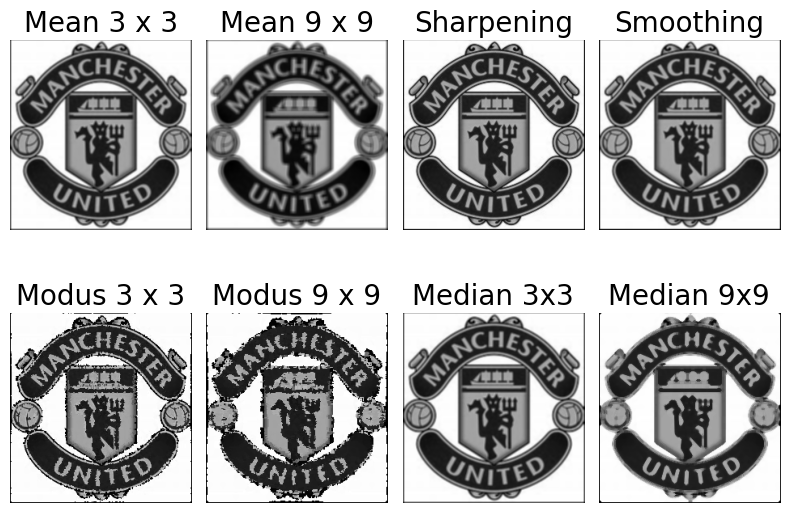

In [301]:
plt.figure(figsize=(8,6))

plt.subplot(2, 4, 1)
plt.imshow(mean3, cmap='gray')
plt.title('Mean 3 x 3', fontsize=20)
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(mean9, cmap='gray')
plt.title('Mean 9 x 9', fontsize=20)
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpening', fontsize=20)
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothing', fontsize=20)
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(modus3, cmap='gray')
plt.title('Modus 3 x 3', fontsize=20)
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(modus9, cmap='gray')
plt.title('Modus 9 x 9', fontsize=20)
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(mean3, cmap='gray')
plt.title('Median 3x3', fontsize=20)
plt.axis('off')

plt.subplot(2, 4, 8)
plt.imshow(median9, cmap='gray')
plt.title('Median 9x9', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()


In [288]:
def padding (img, kernel):
    if len(kernel)%2 == 0:
        n = int(len(kernel)/2)
        result = np.pad (img, ([0,n],[0,n]))
    else:
        n = int((len(kernel)-1)/2)
        result = np.pad (img, ([n,n],[n,n]))
    return result

Kode di atas mendefinisikan sebuah fungsi padding yang bertujuan untuk memberikan padding pada citra input dengan menggunakan kernel tertentu. Fungsi ini memeriksa apakah ukuran kernel genap atau ganjil. Jika kernel genap, maka citra akan dipad sebanyak setengah dari ukuran kernel di setiap sisi. Sedangkan jika kernel ganjil, citra akan dipad sebanyak setengah dari ukuran kernel minus satu di setiap sisi. Hasilnya adalah citra yang dipad sesuai dengan ukuran kernel yang digunakan untuk proses konvolusi.

In [289]:
def konvolusi(pad, img, kernel):
    result = np.zeros(img.shape).astype(int)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            
            for k in range(len(kernel)):
                for l in range(len(kernel)):
                    result[i,j] += pad[i+k,j+l] * kernel[k][l]
    return result


Fungsi konvolusi di atas merupakan implementasi dari operasi konvolusi pada citra menggunakan kernel tertentu. Pertama-tama, fungsi ini menginisialisasi matriks kosong dengan ukuran yang sama seperti citra input. Selanjutnya, dilakukan iterasi pada setiap piksel pada citra input. Pada setiap iterasi piksel, dilakukan operasi konvolusi dengan mengalikan nilai piksel dan nilai kernel pada area tertentu di sekitar piksel tersebut, dan hasilnya ditambahkan ke matriks hasil. Proses ini diulangi untuk setiap piksel pada citra hingga seluruh citra diproses. Hasil akhirnya adalah citra yang telah dikenai operasi konvolusi menggunakan kernel yang ditentukan.

## Melakukan Deteksi Tepi

In [290]:
def edge_detection(image,kernel1,kernel2):
    pad_image = padding(image,kernel1)

    konv1 = konvolusi(pad_image,image,kernel1)
    konv2 = konvolusi(pad_image,image,kernel2)


    result = np.sqrt(konv1**2 + konv2**2)

    return result

Fungsi edge_detection mengimplementasikan deteksi tepi pada citra menggunakan dua kernel konvolusi yang diberikan. Pertama, citra dipad dengan fungsi padding untuk menangani batas citra. Kemudian, dilakukan konvolusi pada citra dengan masing-masing kernel menggunakan fungsi konvolusi. Hasil konvolusi dari kedua kernel digunakan untuk menghitung magnitudo gradien, yang merupakan akar kuadrat dari penjumlahan kuadrat hasil konvolusi dari kedua kernel. Hasil akhirnya adalah citra deteksi tepi.

### Sobel

In [291]:
sobel_x = np.array([ 
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])
sobel_y = np.array([ 
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])

Kode tersebut mendefinisikan dua kernel Sobel, sobel_x dan sobel_y, untuk mendeteksi tepi secara horizontal dan vertikal dalam citra. Kernel ini digunakan untuk menghitung perbedaan intensitas piksel di sekitar suatu titik, membantu dalam mengidentifikasi garis tepi dalam citra.

In [292]:
sobel_mean = edge_detection(mean3, sobel_x, sobel_y)
sobel_mean1 = edge_detection(mean9, sobel_x, sobel_y)

sobel_median = edge_detection(median3, sobel_x, sobel_y)
sobel_median1 = edge_detection(median9, sobel_x, sobel_y)

sobel_modus = edge_detection(modus3, sobel_x, sobel_y)
sobel_modus1 = edge_detection(modus9, sobel_x, sobel_y)

sobel_sharp = edge_detection(sharpened_image, sobel_x, sobel_y)
sobel_smooth = edge_detection(smoothed_image, sobel_x, sobel_y)


Kode di atas menerapkan deteksi tepi pada berbagai jenis citra menggunakan operator Sobel. Operator Sobel digunakan untuk menghitung gradien citra dalam arah horizontal (sobel_x) dan vertikal (sobel_y). Setiap citra jenis, seperti mean, median, modus, sharpened, dan smoothed, diproses secara terpisah menggunakan fungsi edge_detection dengan menggunakan operator Sobel yang sama. Hasilnya adalah citra tepi untuk setiap jenis citra, menunjukkan di mana perubahan yang signifikan dalam intensitas piksel terjadi dalam citra asli.

Kode di bawah menggunakan matplotlib untuk menampilkan citra hasil deteksi tepi dengan operator Sobel untuk berbagai jenis citra secara bersamaan dalam satu gambar. Menggunakan plt.subplot, citra-citra ini ditata dalam grid 2x4 dan 1x4, dengan setiap citra diplotkan pada subplot yang sesuai. Setiap subplot memiliki judul yang sesuai untuk jenis citra yang direpresentasikan dan menggunakan skala abu-abu (cmap='gray') untuk menampilkan citra. Untuk memastikan bahwa sumbu gambar tidak ditampilkan, pemanggilan plt.axis('off') digunakan di setiap subplot. Hasil akhirnya adalah tampilan visual yang memperlihatkan efek deteksi tepi pada berbagai jenis citra menggunakan operator Sobel.

<function matplotlib.pyplot.show(close=None, block=None)>

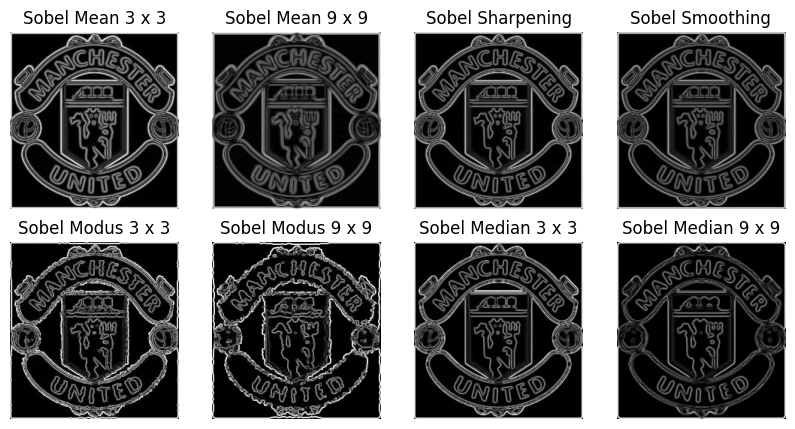

In [293]:
plt.figure(figsize=(10, 10))
plt.subplot(2,4,1)
plt.axis('off')
plt.imshow(sobel_mean, cmap='gray')
plt.title("Sobel Mean 3 x 3")
plt.axis('off')
plt.subplot(2,4,2)
plt.imshow(sobel_mean1, cmap='gray')
plt.title("Sobel Mean 9 x 9")
plt.axis('off')
plt.subplot(2,4,3)
plt.imshow(sobel_sharp, cmap='gray')
plt.title("Sobel Sharpening")
plt.axis('off')
plt.subplot(2,4,4)
plt.imshow(sobel_smooth, cmap='gray')
plt.title("Sobel Smoothing")
plt.axis('off')
plt.subplot(1,4,1)
plt.imshow(sobel_modus, cmap='gray')
plt.title("Sobel Modus 3 x 3")
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(sobel_modus1, cmap='gray')
plt.title("Sobel Modus 9 x 9")
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(sobel_median, cmap='gray')
plt.title("Sobel Median 3 x 3")
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(sobel_median1, cmap='gray')
plt.title("Sobel Median 9 x 9")
plt.axis('off')
plt.show

### Prewitt

In [294]:
prewitt_x = np.array([ 
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])
prewitt_y = np.array([ 
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
])

Kode di atas mendefinisikan dua kernel Prewitt, prewitt_x untuk deteksi tepi horizontal dan prewitt_y untuk deteksi tepi vertikal. Kernel ini digunakan dalam pengolahan citra untuk menyoroti perubahan intensitas piksel yang menunjukkan adanya tepi dalam gambar.

In [295]:
prewitt_mean3 = edge_detection(mean3, prewitt_x, prewitt_y)
prewitt_median3 = edge_detection(median3, prewitt_x, prewitt_y)
prewitt_modus3 = edge_detection(modus3, prewitt_x, prewitt_y)
prewitt_mean9 = edge_detection(mean9, prewitt_x, prewitt_y)
prewitt_median9 = edge_detection(median9, prewitt_x, prewitt_y)
prewitt_modus9 = edge_detection(modus9, prewitt_x, prewitt_y)
prewitt_smoothing = edge_detection(smoothed_image, prewitt_x, prewitt_y)
prewitt_sharpening = edge_detection(sharpened_image, prewitt_x, prewitt_y)

Kode di atas menggunakan fungsi edge_detection untuk mendeteksi tepi pada citra-citra menggunakan filter Prewitt. Citra-citra tersebut termasuk hasil filtrasi dengan mean, median, modus, serta citra hasil smoothing dan sharpening. Prosesnya melibatkan penerapan filter Prewitt secara horizontal dan vertikal pada citra-citra tersebut untuk menghasilkan gambar tepi.

Kode di bawah menggunakan plt.subplot untuk membuat susunan subplot dengan ukuran 2 baris dan 4 kolom. Setiap subplot menampilkan citra hasil deteksi tepi menggunakan filter Prewitt dengan variasi operasi, seperti mean, median, dan modus. Setiap subplot juga diberi judul yang sesuai dengan jenis operasi yang dilakukan. Setelahnya, plt.show() digunakan untuk menampilkan seluruh susunan subplot yang telah dibuat.

<function matplotlib.pyplot.show(close=None, block=None)>

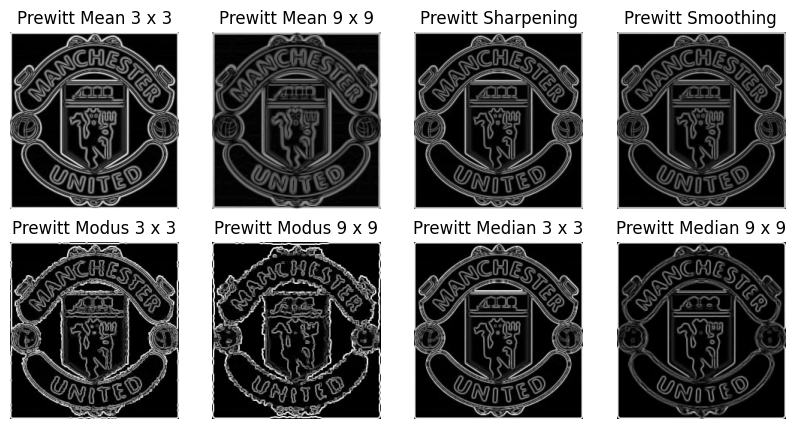

In [296]:
plt.figure(figsize=(10, 10))
plt.subplot(2,4,1)
plt.axis('off')
plt.imshow(prewitt_mean3, cmap='gray')
plt.title("Prewitt Mean 3 x 3")
plt.axis('off')
plt.subplot(2,4,2)
plt.imshow(prewitt_mean9, cmap='gray')
plt.title("Prewitt Mean 9 x 9")
plt.axis('off')
plt.subplot(2,4,3)
plt.imshow(prewitt_sharpening, cmap='gray')
plt.title("Prewitt Sharpening")
plt.axis('off')
plt.subplot(2,4,4)
plt.imshow(prewitt_smoothing, cmap='gray')
plt.title("Prewitt Smoothing")
plt.axis('off')
plt.subplot(1,4,1)
plt.imshow(prewitt_modus3, cmap='gray')
plt.title("Prewitt Modus 3 x 3")
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(prewitt_modus9, cmap='gray')
plt.title("Prewitt Modus 9 x 9")
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(prewitt_median3, cmap='gray')
plt.title("Prewitt Median 3 x 3")
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(prewitt_median9, cmap='gray')
plt.title("Prewitt Median 9 x 9")
plt.axis('off')
plt.show

### Robert

In [297]:
roberts_x = np.array([ 
    [1, 0],
    [0, -1]
])
roberts_y = np.array([
    [0, 1],
    [-1, 0]
])

Kode di atas mendefinisikan dua kernel Roberts, roberts_x untuk deteksi tepi horizontal dan roberts_y untuk deteksi tepi vertikal. Ini adalah filter kecil yang digunakan dalam pengolahan citra untuk mengidentifikasi perubahan intensitas piksel yang menunjukkan adanya tepi dalam gambar

In [298]:
robert_mean3 = edge_detection(mean3, roberts_x, roberts_y)
robert_median3 = edge_detection(median3, roberts_x, roberts_y)
robert_modus3 = edge_detection(modus3, roberts_x, roberts_y)
robert_mean9 = edge_detection(mean9, roberts_x, roberts_y)
robert_median9 = edge_detection(median9, roberts_x, roberts_y)
robert_modus9 = edge_detection(modus9, roberts_x, roberts_y)
robert_smoothing = edge_detection(smoothed_image, roberts_x, roberts_y)
robert_sharpening = edge_detection(sharpened_image, roberts_x, roberts_y)

Kode di atas menggunakan fungsi edge_detection untuk menerapkan deteksi tepi pada citra dengan menggunakan filter Roberts. Operasi deteksi tepi ini dilakukan pada berbagai jenis citra seperti citra dengan filter mean, median, dan modus, serta pada citra hasil operasi sharpening dan smoothing. Hasil dari operasi deteksi tepi ini disimpan dalam variabel yang sesuai untuk digunakan dalam visualisasi atau analisis lebih lanjut.

Kode di bawah digunakan untuk membuat sebuah visualisasi dari hasil deteksi tepi menggunakan filter Roberts pada berbagai jenis citra. Setiap subplot menampilkan hasil deteksi tepi untuk citra dengan filter mean, median, dan modus, serta hasil dari operasi sharpening dan smoothing. Plot ini memberikan pemahaman visual tentang bagaimana deteksi tepi dengan filter Roberts mempengaruhi citra dalam berbagai kondisi.

<function matplotlib.pyplot.show(close=None, block=None)>

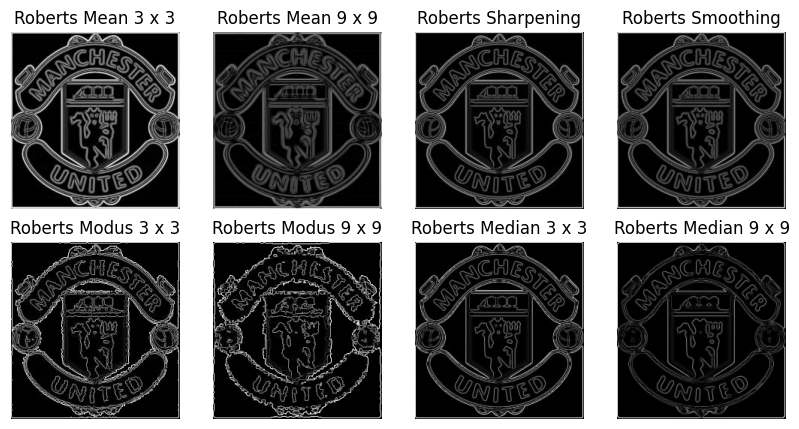

In [299]:
plt.figure(figsize=(10, 10))
plt.subplot(2,4,1)
plt.axis('off')
plt.imshow(robert_mean3, cmap='gray')
plt.title("Roberts Mean 3 x 3")
plt.axis('off')
plt.subplot(2,4,2)
plt.imshow(robert_mean9, cmap='gray')
plt.title("Roberts Mean 9 x 9")
plt.axis('off')
plt.subplot(2,4,3)
plt.imshow(robert_sharpening, cmap='gray')
plt.title("Roberts Sharpening")
plt.axis('off')
plt.subplot(2,4,4)
plt.imshow(robert_smoothing, cmap='gray')
plt.title("Roberts Smoothing")
plt.axis('off')
plt.subplot(1,4,1)
plt.imshow(robert_modus3, cmap='gray')
plt.title("Roberts Modus 3 x 3")
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(robert_modus9, cmap='gray')
plt.title("Roberts Modus 9 x 9")
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(robert_median3, cmap='gray')
plt.title("Roberts Median 3 x 3")
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(robert_median9, cmap='gray')
plt.title("Roberts Median 9 x 9")
plt.axis('off')
plt.show